# Trying the Etude Scripts

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import seaborn as sns
import importlib
import grad_descent as gd

sns.set_theme(style="ticks")


In [2]:
importlib.reload(gd)


<module 'grad_descent' from 'c:\\Users\\Semyon\\Documents\\Python\\20_Projects\\ds_etudes\\grad_descent.py'>

## Example 1 - Weight Vector, **$\vec{w}$**

In [3]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

In [4]:
gd.update_coef(X_train, y_train, w_init, b_init, 1e-3)

(array([  0.39133808,  18.75376742, -53.36032453, -26.42131611]),
 785.1811368010822)

In [5]:
gd.train(X_train, y_train, np.array([0.,0,0,0]), 0., 5e-7, 1000, loss_func="rmse")

epoch: 0, w: [3.83436251e-04 8.87618240e-07 2.91812441e-07 9.58850134e-06], b: 0.0000, rmse: 314.1114
epoch: 100, w: [3.86635275e-02 8.95596870e-05 2.92244976e-05 9.65585117e-04], b: 0.0000, rmse: 255.4609
epoch: 200, w: [7.67435411e-02 1.77921980e-04 5.74691686e-05 1.91319405e-03], b: 0.0000, rmse: 197.4230
epoch: 300, w: [1.14379766e-01 2.65514848e-04 8.44752917e-05 2.84401479e-03], b: 0.0001, rmse: 140.7322
epoch: 400, w: [1.50736861e-01 3.50652324e-04 1.08741721e-04 3.73169135e-03], b: 0.0001, rmse: 87.8269
epoch: 500, w: [1.81864431e-01 4.24835226e-04 1.25007089e-04 4.46319308e-03], b: 0.0001, rmse: 48.7763
epoch: 600, w: [1.97427897e-01 4.64630374e-04 1.23693561e-04 4.76926786e-03], b: 0.0001, rmse: 38.0508
epoch: 700, w: [2.01218646e-01 4.77735565e-04 1.11455019e-04 4.76853310e-03], b: 0.0001, rmse: 37.3664
epoch: 800, w: [2.01986112e-01 4.83907912e-04 9.66860563e-05 4.69074952e-03], b: 0.0001, rmse: 37.3379
epoch: 900, w: [2.02141332e-01 4.88672326e-04 8.14186200e-05 4.59745413

(array([2.02174136e-01, 4.93110998e-04, 6.62061152e-05, 4.50203674e-03]),
 0.00010304962083871962)

## Example 2 - Scalar Weight, **$w$**

In [6]:
data = sns.load_dataset("penguins")

In [7]:
data["body_mass_kg"] = data["body_mass_g"] * 1e-3
data["flipper_length_cm"] = data["flipper_length_mm"] * 1e-2
data = data.iloc[:, -2:].dropna()

In [8]:
X = data.flipper_length_cm.values
y = data.body_mass_kg.values
w = b = 1
alpha = 1e-3

In [9]:
np.polyfit(X, y, 1)

array([ 4.96855664, -5.78083136])

In [10]:
gd.rmse(X, y, *np.polyfit(X, y, 1))

0.3931236269264684

In [11]:
gd.train(X, y, w, b, alpha, 10000, report=500, loss_func="rmse")

epoch: 0, w: 1.001801094694874, b: 1.0009, rmse: 1.3698
epoch: 500, w: 1.4783890586381092, b: 1.2148, rmse: 0.6285
epoch: 1000, w: 1.5064256783846257, b: 1.2016, rmse: 0.6257
epoch: 1500, w: 1.517513664970618, b: 1.1800, rmse: 0.6246
epoch: 2000, w: 1.5282926501239664, b: 1.1583, rmse: 0.6234
epoch: 2500, w: 1.5390531196959547, b: 1.1366, rmse: 0.6222
epoch: 3000, w: 1.549800041301072, b: 1.1149, rmse: 0.6210
epoch: 3500, w: 1.5605334419564982, b: 1.0932, rmse: 0.6199
epoch: 4000, w: 1.5712532637312917, b: 1.0716, rmse: 0.6187
epoch: 4500, w: 1.5819594471355738, b: 1.0500, rmse: 0.6176
epoch: 5000, w: 1.5926519325439936, b: 1.0284, rmse: 0.6164
epoch: 5500, w: 1.6033306602222577, b: 1.0069, rmse: 0.6152
epoch: 6000, w: 1.6139955703300652, b: 0.9854, rmse: 0.6141
epoch: 6500, w: 1.6246466029236932, b: 0.9639, rmse: 0.6129
epoch: 7000, w: 1.6352836979586187, b: 0.9425, rmse: 0.6118
epoch: 7500, w: 1.6459067952921804, b: 0.9210, rmse: 0.6106
epoch: 8000, w: 1.6565158346862827, b: 0.8996, 

(1.6987891148258134, 0.8143638469028657)

In [12]:
vector_mse = np.vectorize(lambda w, b, X=X, y=y: gd.rmse(X, y, w, b))
w_grid, b_grid = np.meshgrid(range(-50,51), range(-50,51))
mse_grid = vector_mse(w_grid, b_grid)
levels = np.logspace(1, 8, 8, base=2)

Text(0, 0.5, 'b')

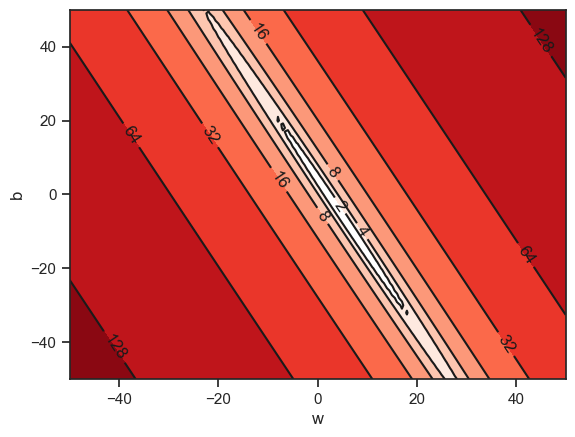

In [13]:
cs0 = plt.contourf(w_grid, b_grid, mse_grid,
    levels=levels, cmap="Reds", norm=LogNorm())
cs1 = plt.contour(cs0, colors="k", levels = cs0.levels)
cs1.clabel(colors="k")
plt.xlabel("w")
plt.ylabel("b")